In [2]:
import pandas as pd
import keras 
import numpy as np
from keras.models import *
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test , y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [4]:
x_train, y_train = x_train[(y_train==1) | (y_train==7)], y_train[(y_train==1) | (y_train==7)]
x_test, y_test = x_test[(y_test==1) | (y_test==7)], y_test[(y_test==1) | (y_test==7)]

In [5]:
np.unique(y_test)

array([1, 7], dtype=uint8)

In [6]:
x_train_final = x_train.reshape((-1,784))
x_train_final.shape

(13007, 784)

In [7]:
x_test_final = x_test.reshape((-1,784))

In [8]:
# normlize the data
x_train_final = x_train_final/255
x_test_final  = x_test_final/255

In [9]:
model = Sequential()
model.add(Dense(200,input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [10]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [11]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test_final,y_test)
)


Epoch 1/30
407/407 [==============================] - 3s 5ms/step - loss: 0.0537 - accuracy: 0.9889 - val_loss: 0.0232 - val_accuracy: 0.9926
Epoch 2/30
407/407 [==============================] - 2s 5ms/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0136 - val_accuracy: 0.9972
Epoch 3/30
407/407 [==============================] - 2s 5ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0108 - val_accuracy: 0.9972
Epoch 4/30
407/407 [==============================] - 2s 5ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9982
Epoch 5/30
407/407 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0175 - val_accuracy: 0.9958
Epoch 6/30
407/407 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0187 - val_accuracy: 0.9958
Epoch 7/30
407/407 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 

Text(0, 0.5, 'losses')

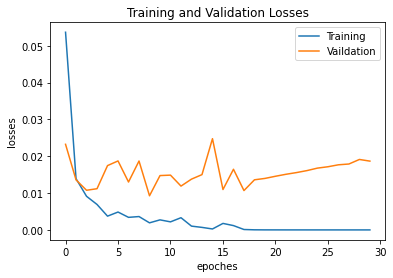

In [14]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

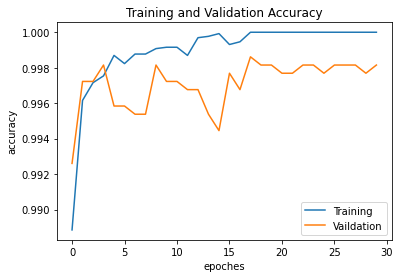

In [15]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')